# Projects in data science: Segmentation

Help for some exercises can be found in notebooks seen during class:
* https://colab.research.google.com/drive/1kE5S3ANwKueksDljVlzTCSi8XfufclSW?usp=sharing for segmentation with shape
* https://colab.research.google.com/drive/1VxD0K_VDy00oU44mHVXlOtiNc1ekU0X_?usp=sharing for segmentation with classification

## Segmentation evaluation

**Exercises**:
1. Load an image and its mask
2. Investigate 2-3 [thresholding](https://scikit-image.org/docs/stable/api/skimage.filters.html) or [segmentation](https://scikit-image.org/docs/stable/api/skimage.segmentation.html) methods from scikit-image to predict masks for you image.
3. For each method, create a predicted mask, calculate the Dice score between the prediction and ground-truth mask. Visualize the results and see if the ranking by Dice score, corresponds with your intuition.
4. Combine the results of different segmentation methods into a single prediction. Does this give a better score than the methods individually?

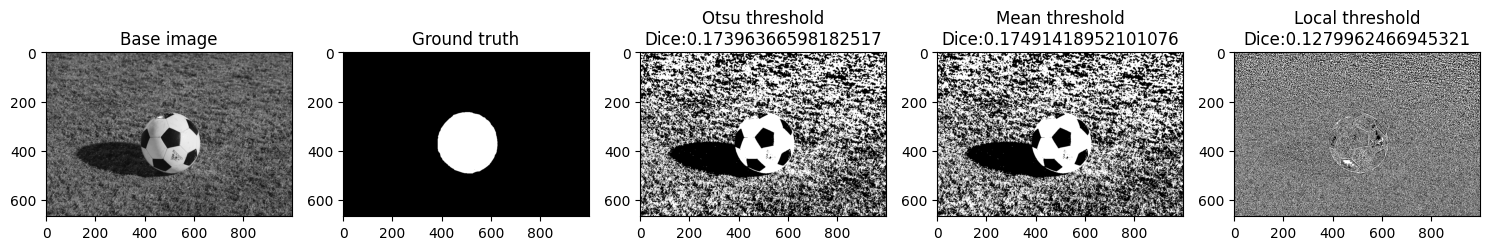

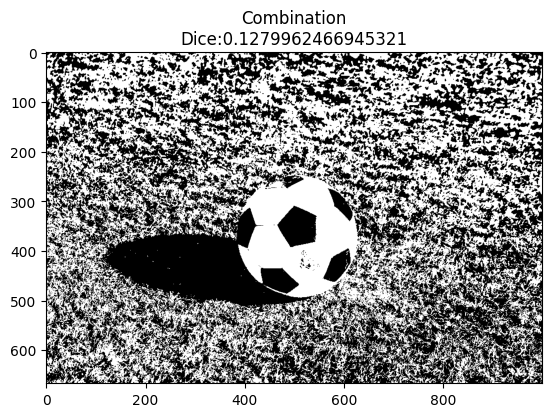

In [1]:
#Your answer
import numpy as np
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu,threshold_mean,threshold_local
import matplotlib.pyplot as plt

#1.
img = rgb2gray(plt.imread("./example_data/football.jpg"))
mask = plt.imread("./example_data/football_mask.png").astype(int)

#2.
otsu_mask = (img >= threshold_otsu(img))
mean_mask = (img >= threshold_mean(img))
local_mask = (img >= threshold_local(img))
predictions = [("Otsu threshold",otsu_mask),("Mean threshold",mean_mask),("Local threshold",local_mask)]
#Compute dice score between two binary mask
def dice_score(mask,gt):
    inter = mask.flatten() & gt.flatten()
    union = mask.flatten() | gt.flatten()
    return (2*np.sum(inter))/(np.sum(union)+np.sum(inter))
#3
fig = plt.figure(figsize=(15,15))

fig.add_subplot(1,len(predictions)+2,1)
plt.imshow(img,cmap="gray")
plt.title("Base image")
fig.add_subplot(1,len(predictions)+2,2)
plt.imshow(mask,cmap="gray")
plt.title("Ground truth")

for i,pred in enumerate(predictions,3):
    fig.add_subplot(1,len(predictions)+2,i)
    plt.imshow(pred[1],cmap="gray")
    plt.title(f"{pred[0]}\nDice:{dice_score(pred[1],mask)}")
fig.tight_layout()

#4
combine_segmentation = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        lst_pred = []
        for pred in predictions:
            lst_pred.append(pred[1][i,j])
        combine_segmentation[i,j] = max(lst_pred,key=lst_pred.count)
plt.figure()
plt.imshow(combine_segmentation,cmap="gray")
plt.title(f"Combination\nDice:{dice_score(pred[1],mask)}")
plt.show()

**Your comments**:

## Gaussian blur

**Exercises**:
1. Load an image and [convert it to grayscale](https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_gray.html) or select only one channel
2. Use [sklearn.filters.gaussian](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian) to blur the image, with different values of sigma. View the result, and a patch of 5x5 pixel values at the center of the image- do they change as you expect?
3. Resize the image to 25% of its original size, and do the same blurring as you did above. Is the effect of each sigma the same as before?
4. Now look at how a 5x5 patch of pixels in the corner of the image has changed - is this what you would expect?
5. Investigate, using one of the function parameter, how you can blur the image only in the x, or only in the y-direction.
6. What happens if you do not convert the image to grayscale?

Effect of gaussian filter on original image


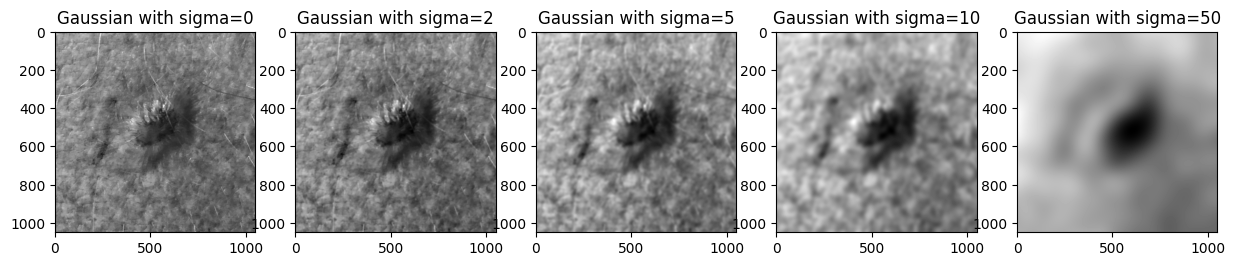

Effect of gaussian filter on resized image


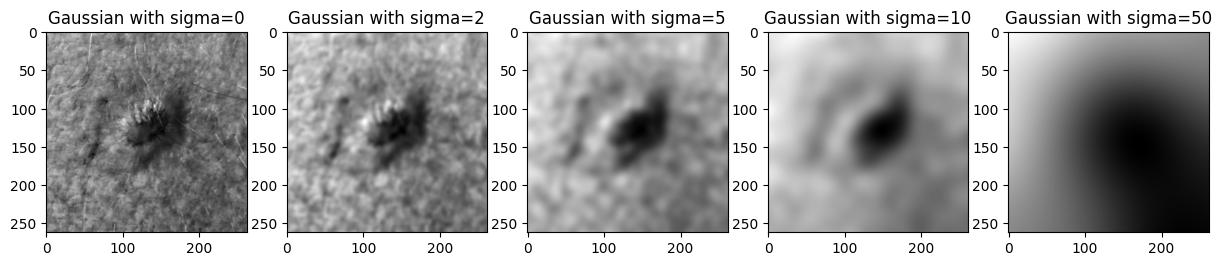

Effect of gaussian filter on x-axis only


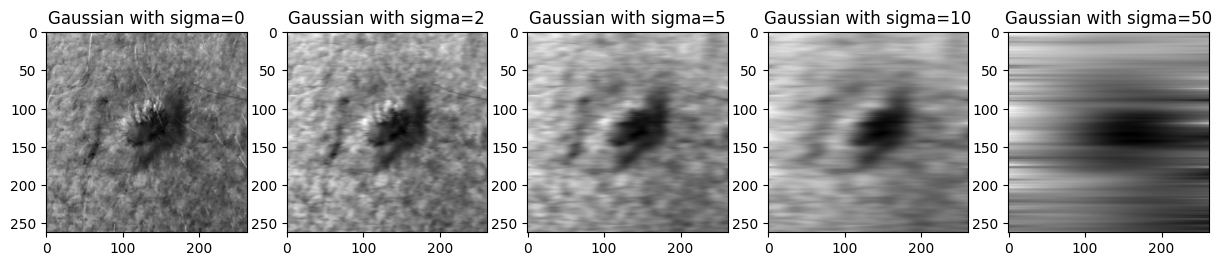

Effect of gaussian filter on y-axis only


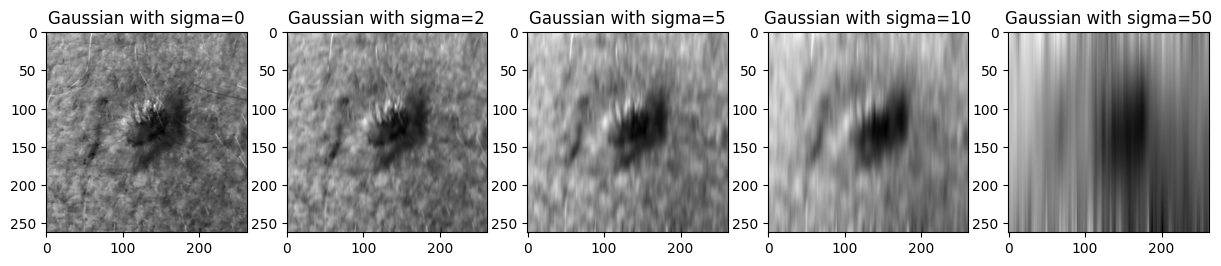

Effect of gaussian filter on rgb image


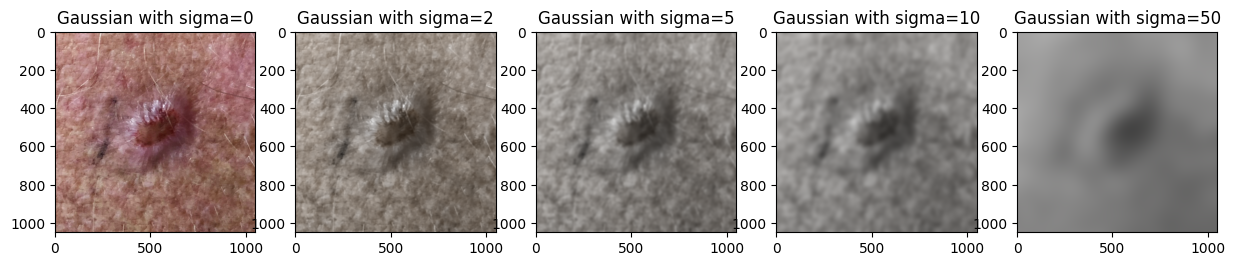

In [2]:
#Your answer
from skimage.filters import gaussian
from skimage.transform import resize

#1
rgb_img = plt.imread("./example_data/PAT_8_15_820.png")[:,:,:3]
img = rgb2gray(rgb_img)

#2 as sigma increase, values are smoothed.
print("Effect of gaussian filter on original image")
sigmas = [0,2,5,10,50]
fig = plt.figure(figsize=(15,10))
for i,s in enumerate(sigmas,1):
    ax = fig.add_subplot(1,len(sigmas),i)
    blurred_img = gaussian(img,s)
    ax.imshow(blurred_img,cmap="gray")
    ax.set_title(f"Gaussian with sigma={s}")
plt.show()

#3&4 As the image is smaller, the effect increase more quickly
print("Effect of gaussian filter on resized image")
resized_img = resize(img,(img.shape[0]*0.25,img.shape[1]*0.25))
fig = plt.figure(figsize=(15,10))
for i,s in enumerate(sigmas,1):
    ax = fig.add_subplot(1,len(sigmas),i)
    blurred_img = gaussian(resized_img,s)
    ax.imshow(blurred_img,cmap="gray")
    ax.set_title(f"Gaussian with sigma={s}")
plt.show()

#5 set sigma parameter to 0 for the specific axis we do not want to use.
#Only for x
print("Effect of gaussian filter on x-axis only")
fig = plt.figure(figsize=(15,10))
for i,s in enumerate(sigmas,1):
    ax = fig.add_subplot(1,len(sigmas),i)
    blurred_img = gaussian(resized_img,(0,s))
    ax.imshow(blurred_img,cmap="gray")
    ax.set_title(f"Gaussian with sigma={s}")
plt.show()

#Only for y
print("Effect of gaussian filter on y-axis only")
fig = plt.figure(figsize=(15,10))
for i,s in enumerate(sigmas,1):
    ax = fig.add_subplot(1,len(sigmas),i)
    blurred_img = gaussian(resized_img,(s,0))
    ax.imshow(blurred_img,cmap="gray")
    ax.set_title(f"Gaussian with sigma={s}")
plt.show()

#6
print("Effect of gaussian filter on rgb image")
fig = plt.figure(figsize=(15,10))
for i,s in enumerate(sigmas,1):
    ax = fig.add_subplot(1,len(sigmas),i)
    blurred_img = gaussian(rgb_img,s)
    ax.imshow(blurred_img,cmap="gray")
    ax.set_title(f"Gaussian with sigma={s}")
plt.show()

**Your comments**:

## Edge Filtering

**Exercises**:
1. Load an example image, you can use the grayscale or RGB version, or filter different channels with different filters.
2. Investigate edge filtering from skimage, [you can find some examples here](https://scikit-image.org/docs/stable/auto_examples/edges/plot_edge_filter.html).


<function matplotlib.pyplot.show(close=None, block=None)>

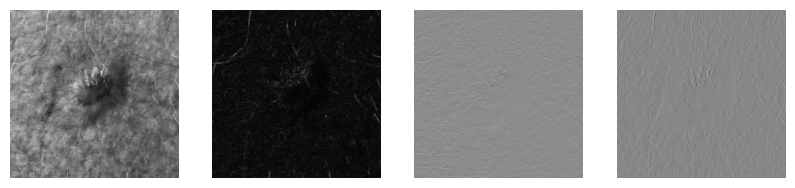

In [3]:
from skimage.filters import sobel,sobel_h,sobel_v
rgb_img = plt.imread("./example_data/PAT_8_15_820.png")[:,:,:3]
img = rgb2gray(rgb_img)

img_sobel_all = sobel(img)
img_sobel_h = sobel_h(img)
img_sobel_v = sobel_v(img)
fig = plt.figure(figsize=(10,10))
fig.add_subplot(141)
plt.imshow(img,cmap="gray")
plt.axis("off")

fig.add_subplot(142)
plt.imshow(img_sobel_all,cmap="gray")
plt.axis("off")

fig.add_subplot(143)
plt.imshow(img_sobel_h,cmap="gray")
plt.axis("off")

fig.add_subplot(144)
plt.imshow(img_sobel_v,cmap="gray")
plt.axis("off")

plt.show

**Your comments**:

## Classification

**Exercises**:
1. Load an image and its mask
2. Apply a total of 5-10 filters from previous exercises, consisting of blurring filters (with different sigmas) and edge filters.
3. Create a dataset where each data point in **X** consist of the values of each filter for a pixel and **Y** is the pixel's class in the mask
4. Train a k-NN classifier on this dataset, and apply the classifier on a different image. Remember, you need to also filter/transform this image.
5. Use the dice score to compare the result of the k-NN classifier with the real mask. Does it match your expectation?

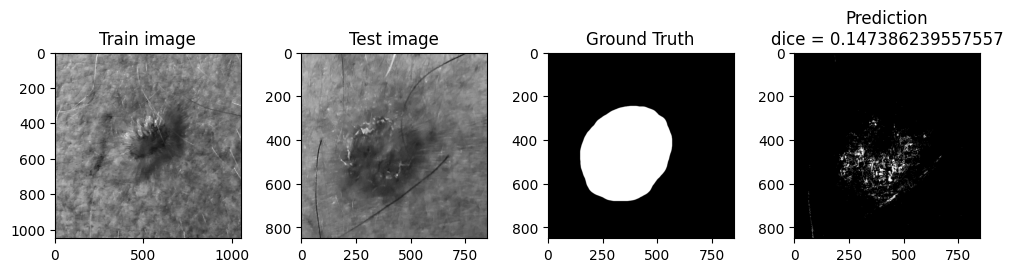

In [4]:
#Your answer
from sklearn.neighbors import KNeighborsClassifier

#1
rgb_img_train = plt.imread("./example_data/PAT_8_15_820.png")[:,:,:3]
img_train = rgb2gray(rgb_img_train)
mask_train = plt.imread("./example_data/PAT_8_15_820_mask.png")

#2
def filters_img(img):
    img_sobel_all = sobel(img)
    img_sobel_h = sobel_h(img)
    img_sobel_v = sobel_v(img)
    img_gaussian_5 = gaussian(img,5)
    img_gaussian_10 = gaussian(img,10)
    img_gaussian_x_10 = gaussian(img,(0,10))
    img_gaussian_y_10 = gaussian(img,(10,0))
    return [img_sobel_all,img_sobel_h,img_sobel_v,img_gaussian_5,img_gaussian_10,img_gaussian_x_10,img_gaussian_y_10]

filters_train = filters_img(img_train)
#3
def construct_data(filters,mask):
    X = []
    y = []
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            x = []
            for filter in filters:
                x.append(filter[i,j])
            X.append(x)
            y.append(mask[i,j])
    X = np.array(X)
    y = np.array(y).astype(int)
    return X,y        
X_train,y_train = construct_data(filters_train,mask_train)

#4
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

rgb_img_test = plt.imread("./example_data/PAT_39_55_233.png")[:,:,:3]
img_test = rgb2gray(rgb_img_test)
mask_test = plt.imread("./example_data/PAT_39_55_233_mask.png")
filters_test = filters_img(img_test)
X_test,y_test = construct_data(filters_test,mask_test)
y_predict = classifier.predict(X_test).reshape(mask_test.shape)

#5
dice = dice_score(y_predict,y_test)

fig = plt.figure(figsize=(10,10))
fig.add_subplot(141)
plt.imshow(img_train,cmap="gray")
plt.title("Train image")

fig.add_subplot(142)
plt.imshow(img_test,cmap="gray")
plt.title("Test image")

fig.add_subplot(143)
plt.imshow(mask_test,cmap="gray")
plt.title("Ground Truth")

fig.add_subplot(144)
plt.imshow(y_predict,cmap="gray")
plt.title(f"Prediction\ndice = {dice}")
fig.tight_layout()

**Your comments**: